In [7]:
import pybel
from pybel.io.jupyter import to_jupyter
from utils import *
import seaborn as sns

In [2]:
itmp_chem = pd.read_csv('C:\\Users\\reagon.karki\\Documents\\ITMP\\EOSC Future\\ITMP ChEMBL data\\CHEMBL4495564.csv',sep=';',usecols=['ChEMBL ID'])

In [3]:
itmp_chem = list(itmp_chem['ChEMBL ID'])

In [ ]:
len(itmp_chem)

In [ ]:
itmp_dis = RetDrugInd(itmp_chem)

In [ ]:
# filename = ('data/normalized_data/bycovid_Aug.pkl')
# outfile = open(filename,'wb')
# pickle.dump(itmp_dis,outfile)

In [ ]:
itmp_dis = RetMech(itmp_chem)

In [ ]:
# filename = ('data/normalized_data/bycovid_itmpMech_Aug.pkl')
# outfile = open(filename,'wb')
# pickle.dump(itmp_dis,outfile)

In [ ]:
itmp_act = RetAct(itmp_chem)

In [ ]:
len(itmp_act)

In [ ]:
# filename = ('data/normalized_data/bycovid_itmpAct_Aug.pkl')
# outfile = open(filename,'wb')
# pickle.dump(itmp_act,outfile)

In [13]:
infile = open('data/normalized_data/bycovid_itmpMech_Aug.pkl','rb')
itmp_mech = pickle.load(infile)
infile.close()

In [14]:
infile = open('data/normalized_data/bycovid_Aug.pkl','rb')
itmp_dis = pickle.load(infile)
infile.close()

In [15]:
infile = open('data/normalized_data/bycovid_itmpAct_Aug.pkl','rb')
itmp_act = pickle.load(infile)
infile.close()

In [16]:
prot_actMech = Ret_chembl_protein(itmp_act) + Ret_chembl_protein(itmp_mech)
prot_actMech = set(prot_actMech)
prot_actMech = list(prot_actMech)

In [17]:
actMech2uprot = chembl2uniprot(prot_actMech)

Populating ChEMBL data for human proteins: 100%|██████████| 1419/1419 [00:04<00:00, 323.49it/s]


In [18]:
uprot = Ret_uprotid(actMech2uprot)

In [19]:
uprot_ext = ExtractFromUniProt(uprot)

reading uprot ids: 100%|██████████| 1419/1419 [05:09<00:00,  4.59it/s]


In [20]:
# filename = ('data/normalized_data/bycovid_uprotExt_Aug.pkl')
# outfile = open(filename,'wb')
# pickle.dump(uprot_ext,outfile)

In [ ]:
infile = open('data/normalized_data/bycovid_uprotExt_Aug.pkl','rb')
uprot_ext = pickle.load(infile)
infile.close()

In [ ]:
itmp_act

In [21]:
itmp_act = chembl2gene2path(actMech2uprot,itmp_act)
itmp_mech = chembl2gene2path(actMech2uprot,itmp_mech)

In [22]:
itmp_graph = pybel.BELGraph(name='ITMP Graph', version="0.0.1")

In [23]:
itmp_graph = chem2moa_rel(itmp_mech,'HGNC',itmp_graph)
itmp_graph = chem2dis_rel(itmp_dis,itmp_graph)
itmp_graph = chem2act_rel(itmp_act,'HGNC',itmp_graph)
itmp_graph = gene2path_rel(actMech2uprot,'HGNC',itmp_graph)
itmp_graph = uniprot_rel(uprot_ext,'HGNC',itmp_graph)

Adding bioassay edges to BEL: 100%|██████████| 2494/2494 [00:09<00:00, 274.65it/s]


In [52]:
#Extract chembl ids from graph
chembls = getNodeList('ChEMBL',itmp_graph)

In [54]:
#add relation: chembl to side effects from opentargets platform
itmp_graph = chembl2rxn_rel(ChEMBLids,itmp_graph)

In [58]:
# filename = ('data/normalized_data/bycovid_itmpGraph.pkl')
# outfile = open(filename,'wb')
# pickle.dump(itmp_graph,outfile)

In [ ]:
infile = open('data/normalized_data/bycovid_itmpGraph.pkl','rb')
itmp_graph = pickle.load(infile)
infile.close()

In [55]:
itmp_graph.summarize

Name,ITMP Graph
Version,0.0.1
Nodes,35952
Namespaces,9
Edges,279462
Annotations,0
Citations,3
Authors,0
Components,1
Warnings,0
Network Density,0.000216


[Text(0.5, 0, 'Node'),
 Text(0, 0.5, 'Number'),
 Text(0.5, 1.0, 'KG nodes in numbers (Total=35952)')]

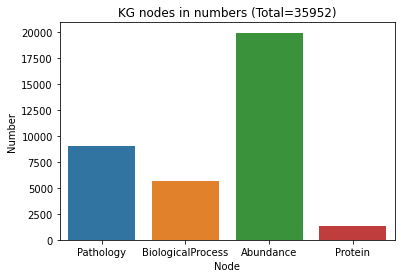

In [56]:
node_data = {'Node':['Pathology','BiologicalProcess','Abundance','Protein'],
       'Number':[9005,5669,19931,1347]}
node = pd.DataFrame(node_data)
a = sns.barplot(x="Node", y="Number", data=node)
a.set(xlabel='Node',ylabel='Number',title= 'KG nodes in numbers (Total=35952)')

[Text(0.5, 0, 'Number'),
 Text(0, 0.5, 'Namespace'),
 Text(0.5, 1.0, 'KG Namespace in numbers')]

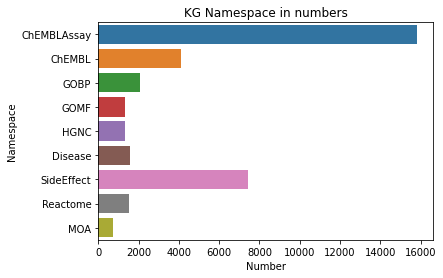

In [57]:
nspace_data = {'Namespace':['ChEMBLAssay','ChEMBL','GOBP','GOMF','HGNC','Disease','SideEffect','Reactome','MOA'],
       'Number':[15835,4096,2085,1332,1347,1585,7420,1513,739]}
nspace = pd.DataFrame(nspace_data)
a = sns.barplot(x="Number", y="Namespace", data=nspace_data)
a.set(xlabel='Number',ylabel='Namespace',title= 'KG Namespace in numbers')

In [60]:
#to cytoscape compatible graphml 
pybel.to_graphml(itmp_graph,'data/export//bycovidgraph_2ndSep.graphml')

#to regular BEL format
pybel.dump(itmp_graph,'data/export//bycovidgraph_2ndSep.bel')

#to neo4j
pybel.to_csv(itmp_graph,'data/export//bycovidgraph_2ndSep.csv')

#to sif
pybel.to_sif(itmp_graph,'data/export//bycovidgraph_2ndSep.sif')